In [161]:
## For data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
import statsmodels
import scipy
## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [106]:
choco = pd.read_csv("data/chocolate.csv")
choco.columns

Index(['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

In [162]:
num_cols = ['cocoa_percent', 'counts_of_ingredients', 'review_date']

In [140]:
choco.review_date

0       2019
1       2019
2       2019
3       2012
4       2012
        ... 
2219    2014
2220    2017
2221    2018
2222    2018
2223    2018
Name: review_date, Length: 2224, dtype: int64

In [113]:
#|choco.drop(columns = ['Unnamed: 0', 'ref', 'beans'], inplace = True)
choco.ref.sort_values()

1092       5
1790      15
953       15
938       15
1478      15
        ... 
1508    2486
1361    2486
2078    2490
2079    2490
1453    2490
Name: ref, Length: 2224, dtype: int64

In [99]:
# except for the taste profile, there isn't any missing value
choco.isnull().sum()

company                                0
company_location                       0
review_date                            0
country_of_bean_origin                 0
specific_bean_origin_or_bar_name       0
cocoa_percent                          0
rating                                 0
counts_of_ingredients                  0
cocoa_butter                           0
vanilla                                0
lecithin                               0
salt                                   0
sugar                                  0
sweetener_without_sugar                0
first_taste                            0
second_taste                          77
third_taste                          620
fourth_taste                        1982
dtype: int64

In [19]:
origin = choco["country_of_bean_origin"].unique()
compLoc = choco["company_location"].unique()
comp = choco["company"].unique()

In [104]:
choco.nunique()

company                              502
company_location                      66
review_date                           15
country_of_bean_origin                62
specific_bean_origin_or_bar_name    1398
cocoa_percent                         46
rating                                13
counts_of_ingredients                  6
cocoa_butter                           2
vanilla                                2
lecithin                               2
salt                                   2
sugar                                  2
sweetener_without_sugar                2
first_taste                          456
second_taste                         479
third_taste                          332
fourth_taste                          88
dtype: int64

In [85]:
print(choco["cocoa_butter"].value_counts('have_cocoa_butter'))
print("-------------------------------------------")
print(choco["sugar"].value_counts('have_sugar'))
print("-------------------------------------------")
print(choco["sweetener_without_sugar"].value_counts('have_sweetener_without_sugar'))
print("-------------------------------------------")
print(choco["vanilla"].value_counts('have_vanilla'))
print("-------------------------------------------")
print(choco["lecithin"].value_counts('have_lecithin'))
print("-------------------------------------------")
print(choco["salt"].value_counts('have_salt'))

have_cocoa_butter        0.690198
have_not_cocoa_butter    0.309802
Name: cocoa_butter, dtype: float64
-------------------------------------------
have_sugar        0.963129
have_not_sugar    0.036871
Name: sugar, dtype: float64
-------------------------------------------
have_not_sweetener_without_sugar    0.965827
have_sweetener_without_sugar        0.034173
Name: sweetener_without_sugar, dtype: float64
-------------------------------------------
have_not_vanila    0.843525
have_vanila        0.156475
Name: vanilla, dtype: float64
-------------------------------------------
have_not_lecithin    0.784622
have_lecithin        0.215378
Name: lecithin, dtype: float64
-------------------------------------------
have_not_salt    0.983363
have_salt        0.016637
Name: salt, dtype: float64


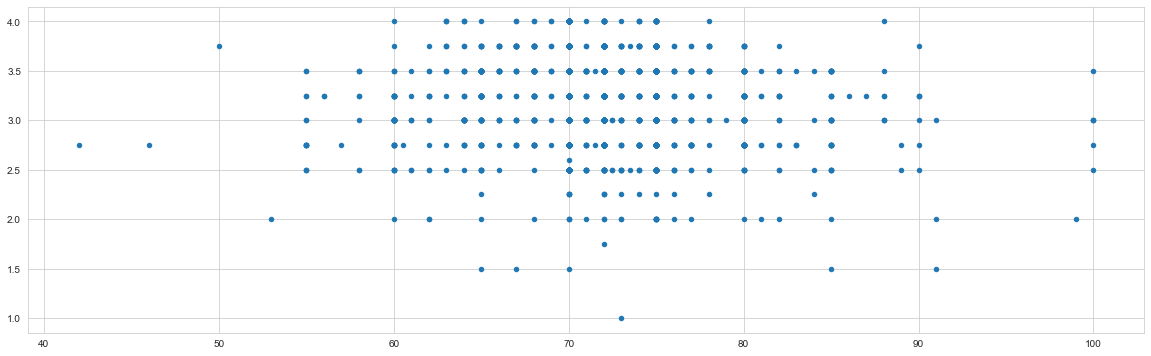

In [92]:
# silly plotting
# cocoa_percent v rating
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"], choco["rating"], s = 20)
plt.show()
# the ratings are quite discrete...

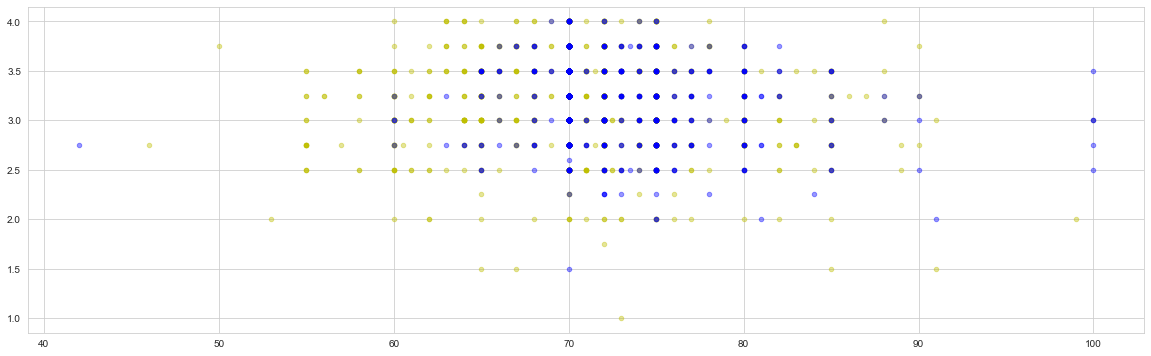

In [90]:
# cocoa_butter
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"].loc[choco["cocoa_butter"]=="have_cocoa_butter"] 
            ,choco["rating"].loc[choco["cocoa_butter"]=="have_cocoa_butter"]
           ,color='y', alpha = 0.4, s = 20)
plt.scatter(choco["cocoa_percent"].loc[choco["cocoa_butter"]=="have_not_cocoa_butter"] 
            ,choco["rating"].loc[choco["cocoa_butter"]=="have_not_cocoa_butter"]
           ,color='b', alpha = 0.4, s = 20)
plt.show()

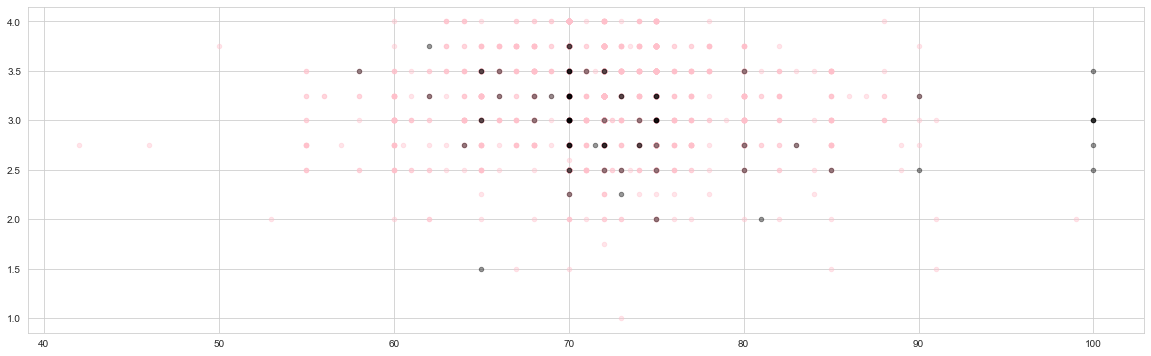

In [91]:
# sugar
plt.figure(figsize=(20, 6))
plt.scatter(choco["cocoa_percent"].loc[choco["sugar"]=="have_sugar"] 
            ,choco["rating"].loc[choco["sugar"]=="have_sugar"]
           ,color='pink', alpha = 0.4, s = 20)
plt.scatter(choco["cocoa_percent"].loc[choco["sugar"]=="have_not_sugar"] 
            ,choco["rating"].loc[choco["sugar"]=="have_not_sugar"]
           ,color='k', alpha = 0.4, s = 20)
plt.show()



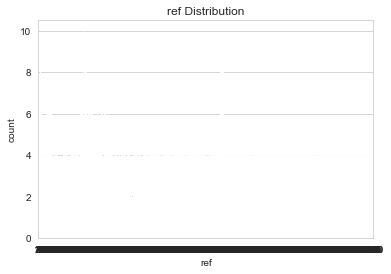

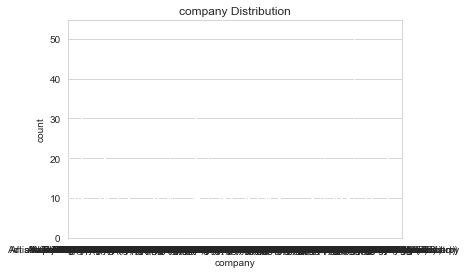

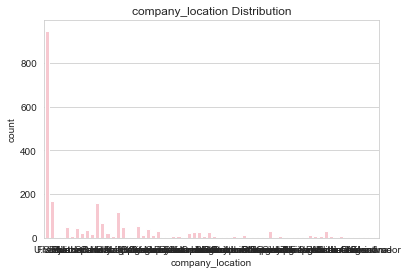

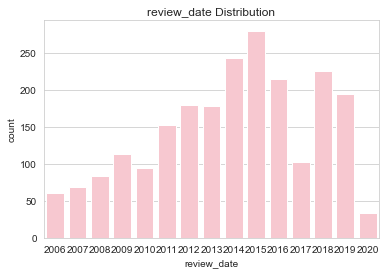

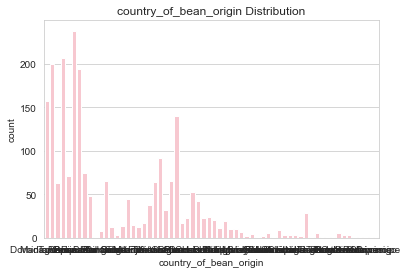

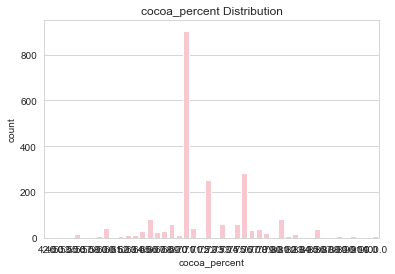

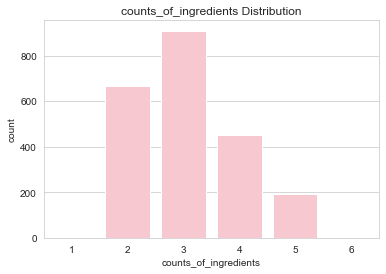

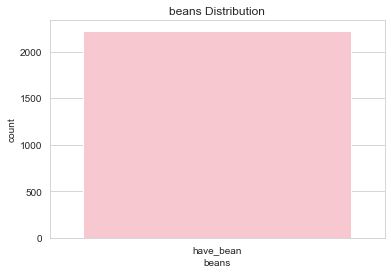

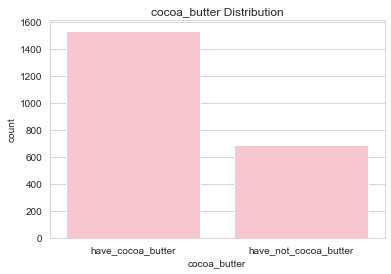

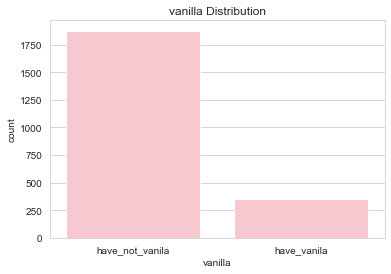

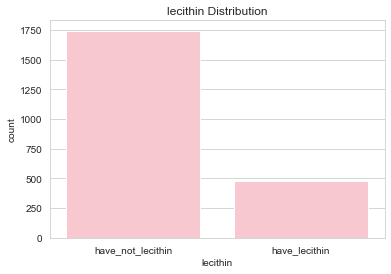

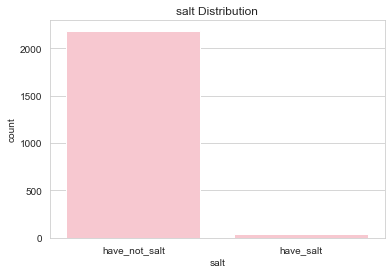

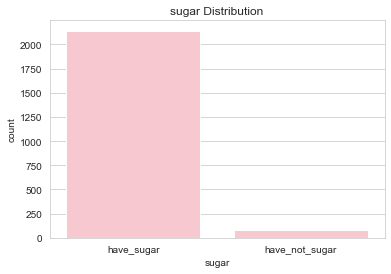

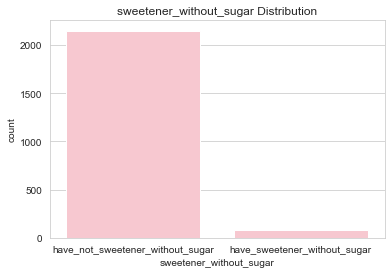

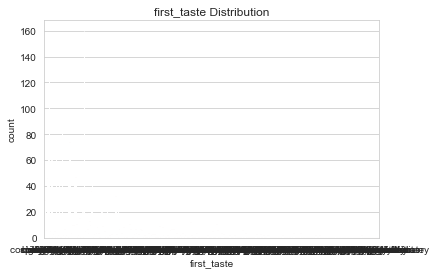

KeyboardInterrupt: 

In [137]:
col_list = choco.columns.tolist()
col_list.remove('rating')
#set threshold
k = 100
num_cols, cat_cols = [], []

for col in col_list:
    if choco[col].nunique() <= k:
        cat_cols.append(col)
    else:
        num_cols.append(col)

for variable in cat_cols:
    sns.countplot(x = variable, color='pink', data = choco)
    plt.title(variable + ' ' + 'Distribution')
    plt.show()


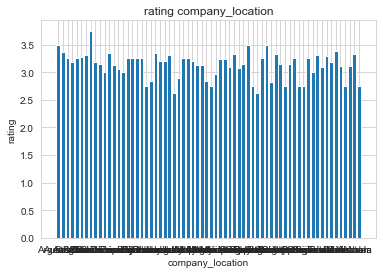

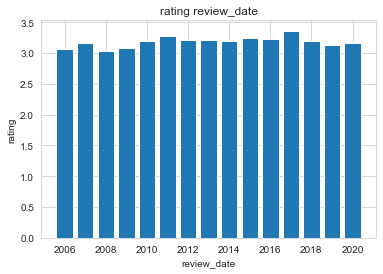

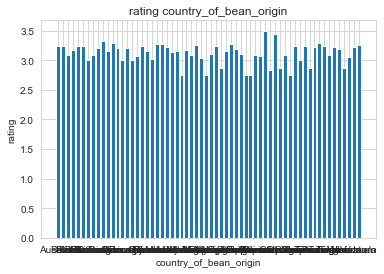

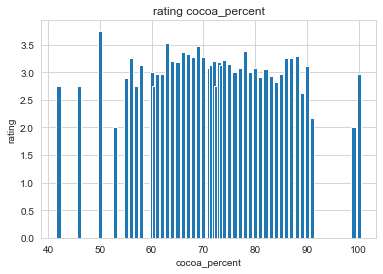

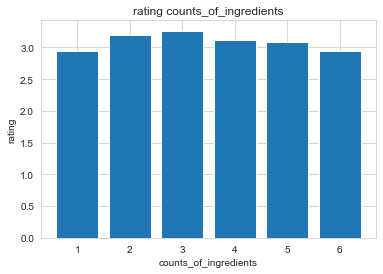

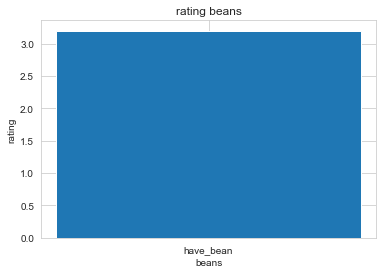

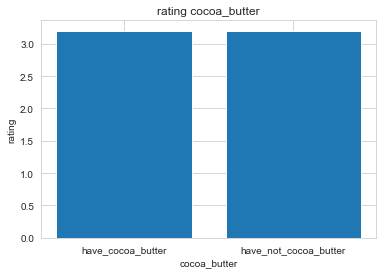

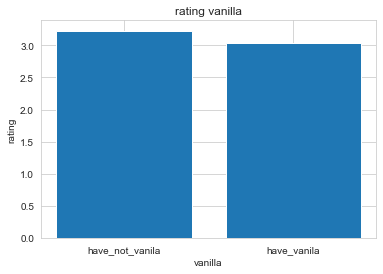

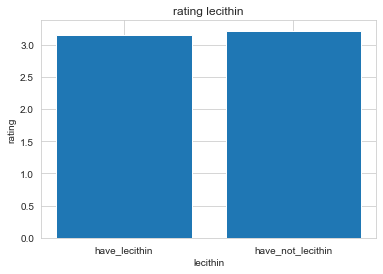

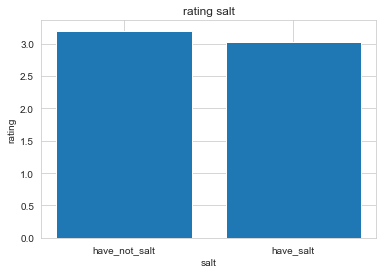

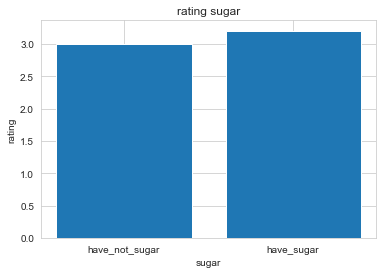

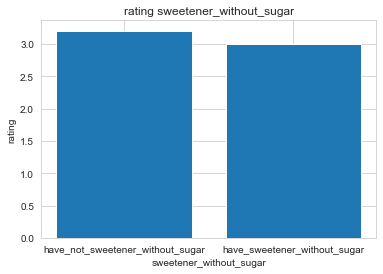

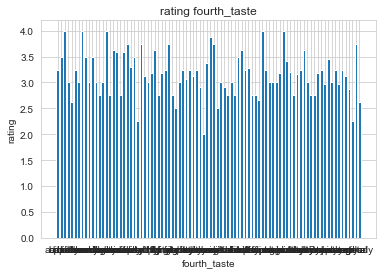

In [134]:
for variable in cat_cols:
    train_cat = choco.groupby(by=[variable]).mean()
    plt.bar(train_cat.index, train_cat['rating'])
    plt.xlabel(variable)
    plt.ylabel('rating')
    plt.title('rating' + ' ' + variable)
    plt.show()

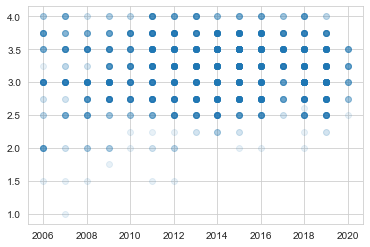

In [146]:
plt.scatter(choco['review_date'], choco['rating'], alpha = 0.1)

In [148]:
choco[['first_taste', 'second_taste', 'third_taste',
       'fourth_taste']].nunique()

first_taste     456
second_taste    479
third_taste     332
fourth_taste     88
dtype: int64

In [150]:
taste = pd.read_csv("data/chocolate_taste_dataset.csv")

In [159]:
taste.loc[taste['taste']=='wtf']

,taste,count_of_taste
555,wtf,1


In [158]:
taste.loc[taste['count_of_taste'] >= 50]

,taste,count_of_taste
0,nutty,238
1,sweet,237
2,cocoa,203
3,roasty,198
4,creamy,184
5,earthy,164
6,sandy,153
7,fatty,149
8,floral,133
9,intense,132
